In [1]:
#Packages needed
import os
os.chdir("C:\\Users\\anukapoor\\Desktop\\cleanup\\ML guild\\Capstone project")
import pandas as pd  #pandas for using dataframe and reading csv 
import numpy as np   #numpy for vector operations and basic maths 
import urllib        #for url stuff
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
#from haversine import haversine # for calculating haversine distance
import math          #for basic maths operations
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting

import nltk
from nltk.corpus import stopwords
import string
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes

from sklearn.model_selection import train_test_split

In [2]:
%%time
data=pd.read_csv("train.tsv", sep='\t')
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(data, test_size=0.2, random_state=1987)
#train_df=data




Wall time: 12.5 s


In [8]:
 pd.options.display.max_colwidth = 1000

In [11]:
train_df.tail(100)


train_id                                      name  item_condition_id                                        category_name         brand_name  price  shipping  \
128567     128567                   12 Months Picture frame                  2                Home/Home Décor/Photo Albums & Frames                NaN    8.0         0   
182184     182184               Mossimo M sweater knit vest                  3                      Women/Sweaters/Vest, Sleeveless            Mossimo    8.0         1   
762535     762535                         Supreme/Hanes tee                  1                                    Men/Tops/T-shirts            Supreme   24.0         0   
880460     880460                         Amazon fire stick                  1         Electronics/TV, Audio & Surveillance/Gadgets       AmazonBasics   76.0         0   
250504     250504                          Rae Dunn bFF Mug                  1       Home/Kitchen & Dining/Coffee & Tea Accessories           Rae Dunn   16.0         0   
1380333   1380333                        Torrid Graphic Tee                  3                        Women/Tops & Blouses/T-Shirts             Torrid    5.0         1   
1317271   1317271               Toms shoes Love pattern 8.5                  3                                    Women/Shoes/Flats               TOMS   12.0         0   
1103358   1103358                               BELLY RINGS                  2                                  Women/Jewelry/Rings                NaN    3.0         1   
1385673   1385673                             King Tut Head                  2              Vintage & Collectibles/Home Decor/Other                NaN   12.0         0   
880978     880978     Calvin Klein Bra & Panty Matching Set                  1                   Women/Athletic Apparel/Sports Bras       Calvin Klein   18.0         1   
624547     624547                         Choker set 10 pcs                  1                              Women/Jewelry/Necklaces                NaN    7.0         1   
103842     103842            NWT 34 BOOTCUT MISS ME JEANS!!                  1                                 Women/Jeans/Boot Cut            Miss Me   76.0         0   
957615     957615        Alex & Ani JAMAICA Bracelet *RARE*                  2                              Women/Jewelry/Bracelets       ALEX AND ANI   44.0         0   
1164836   1164836                    Maurices top with belt                  3                          Women/Tops & Blouses/Blouse           Maurices   10.0         0   
373590     373590                                      Belt                  1                          Men/Men's Accessories/Belts              Gucci   60.0         1   
659726     659726                             Baby boy bibs                  3                       Kids/Boys 0-24 Mos/Accessories                NaN   24.0         0   
365546     365546           Youth boys UA baseball pant YXL                  2    Sports & Outdoors/Team Sports/Baseball & Softball       Under Armour   13.0         0   
1002652   1002652    Rainbow Rainmate Air Freshener& quilib                  3                Home/Cleaning Supplies/Air Fresheners                NaN   30.0         1   
400656     400656                               LuLaroe Tee                  2                        Women/Tops & Blouses/T-Shirts                NaN   16.0         0   
986982     986982         Brahmin Tyler Satchel in Twilight                  2                       Women/Women's Handbags/Satchel                NaN  235.0         0   
1035856   1035856    New Michael Kors Citrus Sporty Perfume                  1                               Beauty/Fragrance/Women                NaN   13.0         1   
718402     718402                    Boys Size 8 WWE Outfit                  2                        Kids/Boys (4+)/Top & T-shirts           Carter's    7.0         0   
488960     488960               Lenny & Larry @misstorirose                 

In [5]:
data_new.columns

NameError: name 'data_new' is not defined

In [6]:
test_df.head()

train_id                          name  item_condition_id  \
29514      29514              HAPPY HOLLA DAYS                  2   
853729    853729          Genuine Pink Diamond                  1   
146819    146819    Earthbound patterned dress                  1   
387021    387021                   Lip glosses                  1   
272910    272910  2 Magic Sequin Pillow Covers                  1   

                                            category_name brand_name  price  \
29514                         Handmade/Holidays/Christmas        NaN   16.0   
853729               Vintage & Collectibles/Jewelry/Other        NaN  110.0   
146819                          Women/Dresses/Knee-Length        NaN   10.0   
387021                                 Beauty/Makeup/Lips        NaN    8.0   
272910  Home/Bedding/Decorative Pillows, Inserts & Covers        NaN   10.0   

        shipping                                   item_description  
29514          0  Excellent Condition! Homemade, hand stiched, f...  
853729         1  Beautiful Natural Pink Diamond 0.12 cttw 3.7mm...  
146819         0  Never been worn, still has tags. Made from a t...  
387021         1  New hard candy lip glosses 2 set Charj gets 1s...  
272910         1  Both new These are 16" throw Pillow Covers Ins...

In [84]:
train_df.shape

(1186028, 8)

In [24]:
test_df.tail(10)


train_id                                      name  \
975593     975593     Pampered Chef Apple peeler slicer NEW   
1002619   1002619                      Reebok running shoes   
429619     429619                   Good Vibes baseball cap   
386885     386885                   Mens Nike Roshe size 11   
168123     168123        RARE Victoria secret set bra panty   
463336     463336       Princess and the frog soundtrack cd   
197709     197709               20g Gold Hoop Body Piercing   
266058     266058   Men's Under Armor Sweat Pants Size (SM)   
132677     132677                                Gold dress   
591390     591390  Hanes Premium Original Fit Tagless Brief   

         item_condition_id                                     category_name  \
975593                   1  Home/Kitchen & Dining/Kitchen Utensils & Gadgets   
1002619                  2                              Women/Shoes/Athletic   
429619                   1                    Women/Women's Accessories/Hats   
386885                   3                                Men/Shoes/Athletic   
168123                   1                              Women/Underwear/Bras   
463336                   1                              Electronics/Media/CD   
197709                   2                            Women/Jewelry/Earrings   
266058                   2                            Men/Pants/Casual Pants   
132677                   3                           Kids/Girls (4+)/Dresses   
591390                   1                                   Men/Other/Other   

                brand_name  price  shipping  \
975593       Pampered Chef   24.0         0   
1002619             Reebok   21.0         0   
429619                 NaN    8.0         0   
386885                Nike   47.0         1   
168123   Victoria's Secret   28.0         0   
463336                 NaN    5.0         1   
197709                 NaN    3.0         1   
266058        Under Armour   16.0         0   
132677                 NaN   20.0         1   
591390               Hanes   14.0         0   

                                          item_description  
975593   Pampered chef Apple peeler corer slicer new in...  
1002619  Never worn other than at the store, just sat i...  
429619       Good Vibes Baseball Cap. Custom made polo cap  
386885   Mens Nike Roshe size 11. In good condition. Ve...  
168123   Bra size 36c Panty size medium have keyhole ba...  
463336                                  No description yet  
197709   ***This is for ONE piercing*** Can be used for...  
266058   Great sweat pants, I used them for basketball....  
132677            Size 6 Beautiful golf dress with sparkle  
591390   Hanes Premium Original Fit 6 Tagless Briefs BR...

In [86]:
train_df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [87]:
train_df.describe()

train_id  item_condition_id         price      shipping
count  1.186028e+06       1.186028e+06  1.186028e+06  1.186028e+06
mean   7.412334e+05       1.907791e+00  2.672884e+01  4.475872e-01
std    4.279332e+05       9.033467e-01  3.842720e+01  4.972455e-01
min    0.000000e+00       1.000000e+00  0.000000e+00  0.000000e+00
25%    3.709005e+05       1.000000e+00  1.000000e+01  0.000000e+00
50%    7.412935e+05       2.000000e+00  1.700000e+01  0.000000e+00
75%    1.111776e+06       3.000000e+00  2.900000e+01  1.000000e+00
max    1.482534e+06       5.000000e+00  2.009000e+03  1.000000e+00

Wall time: 627 ms


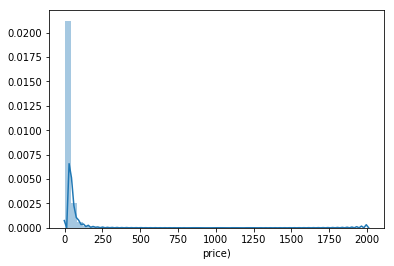

In [88]:
%%time
#checking price distribution
sns.distplot((train_df['price']),axlabel="price)")

Highly skewed to the left so taking log transform

Wall time: 600 ms


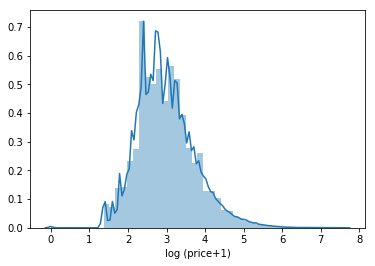

In [89]:
%%time
# Lets check the basic price histogram and see if what is the range of prices 
sns.distplot(np.log((train_df['price']+1)),axlabel="log (price+1)")

In [90]:
%%time
prc_shipBySeller = train_df.loc[train_df.shipping==1, 'price']
prc_shipByBuyer = train_df.loc[train_df.shipping==0, 'price']


Wall time: 36 ms


In [91]:
%%time
fig, ax = plt.subplots()
for a in [np.log(prc_shipBySeller+1), np.log(prc_shipByBuyer+1)]:
    sns.distplot(a, ax=ax,axlabel="log (price+1)")

Wall time: 494 ms


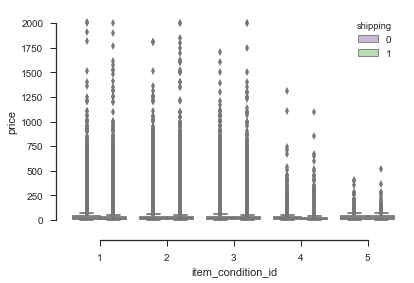

In [92]:

sns.set(style="ticks")

# Draw a nested boxplot to show condition and shippong effect
sns.boxplot(x="item_condition_id", y="price",hue="shipping" ,data=train_df, palette="PRGn")
sns.despine(offset=10, trim=True)

shows a lot of variance lets go with log prices


In [3]:
train_df['logprice']=np.log(train_df['price']+1)

sns.set(style="ticks")

# Draw a nested boxplot to show condition and shippong effect
sns.boxplot(x="item_condition_id", y="logprice",hue="shipping" ,data=train_df, palette="PRGn")
sns.despine(offset=10, trim=True)

C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
np.log(100)

4.6051701859880918

In [94]:
test_df['logprice']=np.log(test_df['price']+1)

C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Very clear that shipped by seller is always less than shipping cost paid by customer so our intitution is right
Also item 5 has the highest mean price as compared to other
One thing that surprises me that there is 0 log price in each which needs to be checked


In [6]:
train_df[(train_df['price']==0)].head()

train_id                                  name  item_condition_id  \
1325      1325  Alabama Crimson Tide Quality Lanyard                  1   
2544      2544                         Levi leggings                  3   
2712      2712          Simple Red Lace Lingerie Top                  3   
3576      3576      Turquoise 15 Pc Makeup Brush Set                  1   
3761      3761                        Girls size 7/8                  3   

                                          category_name brand_name  price  \
1325                    Sports & Outdoors/Fan Shop/NCAA        NaN    0.0   
2544                           Women/Jeans/Slim, Skinny    Levi's®    0.0   
2712                 Women/Underwear/G-Strings & Thongs        NaN    0.0   
3576  Beauty/Tools & Accessories/Makeup Brushes & Tools        NaN    0.0   
3761                    Kids/Girls (4+)/Tops & T-Shirts        NaN    0.0   

      shipping                                   item_description  
1325         1  TOP QUALITY THICK LANYARD Reversible sides wit...  
2544         0  Light wash. Hardly worn. Size 24 but fits like...  
2712         0  Very simple but cute, a little form fitting as...  
3576         1                                            1 left!  
3761         1  5 pair gap jean excellent used condition 3 chi...

In [7]:
train_df[(train_df['price']==0)].count()

train_id             874
name                 874
item_condition_id    874
category_name        861
brand_name           528
price                874
shipping             874
item_description     874
dtype: int64

In [97]:
test_df[(test_df['price']==0)].count()
test_df=test_df[test_df['price']!=0]

In [31]:
train_df=train_df[train_df['price']!=0]
train_df.shape

(1185319, 9)

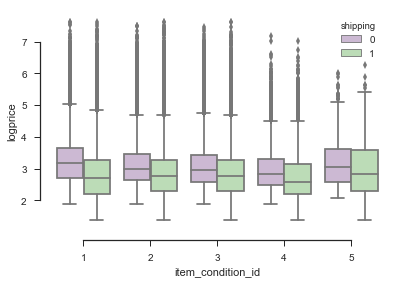

In [99]:
sns.set(style="ticks")

# Draw a nested boxplot to show condition and shippong effect
sns.boxplot(x="item_condition_id", y="logprice",hue="shipping" ,data=train_df, palette="PRGn")
sns.despine(offset=10, trim=True)

price =0 doesn't make sense as you won't be selling product free of cost so it is probably the noise in the data and losing this data is the best option as it is very small amount

In [100]:
train_df.groupby(['item_condition_id']).mean().price

item_condition_id
1    26.500579
2    27.536492
3    26.589972
4    24.092923
5    31.425587
Name: price, dtype: float64

Which shows that item condition 5 has highest averge price

In [4]:
def split_cat(row):
    try: 
        cat_1,cat_2,cat_3=row.split('/')
        return cat_1,cat_2,cat_3
    except:
        return np.nan,np.nan,np.nan
        

In [5]:
# Here we are using zip(* something ) to unzip list of tuples
train_df["cat_1"], train_df["cat_2"], train_df["cat_3"] = zip(*train_df.category_name.apply(lambda val: split_cat(val)))
train_df.head()

C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


train_id                                     name  item_condition_id  \
1306214   1306214       MEN'S hiking Columbia shorts as xl                  3   
1348776   1348776  Itzy Bitzy Squeaker shoes, toddler sz 6                  3   
181975     181975                           VS Yoga shorts                  2   
875323     875323          3 receiving blankets and rattle                  1   
808377     808377  Spell & gypsy design primrose playdress                  3   

                          category_name         brand_name  price  shipping  \
1306214     Men/Athletic Apparel/Shorts                NaN   18.0         0   
1348776          Kids/Girls 2T-5T/Shoes                NaN   10.0         1   
181975    Women/Athletic Apparel/Shorts  Victoria's Secret   12.0         1   
875323             Kids/Nursery/Bedding                NaN   14.0         0   
808377   Women/Dresses/Above Knee, Mini        Free People  141.0         0   

                                          item_description  logprice  cat_1  \
1306214                                 Minor marker specs  2.944439    Men   
1348776  White Itsy Bitsy Squeaker shoes, toddler sz 6....  2.397895   Kids   
181975   Worn maybe twice! Nothing wrong with them. I j...  2.564949  Women   
875323   Brand new with tags never opened 3 blankets On...  2.708050   Kids   
808377   Mini play dress. Sold out everywhere. Also sol...  4.955827  Women   

                    cat_2             cat_3  
1306214  Athletic Apparel            Shorts  
1348776       Girls 2T-5T             Shoes  
181975   Athletic Apparel            Shorts  
875323            Nursery           Bedding  
808377            Dresses  Above Knee, Mini

In [103]:
test_df["cat_1"], test_df["cat_2"], test_df["cat_3"] = zip(*test_df.category_name.apply(lambda val: split_cat(val)))


In [111]:
#benchmark model
benchmark_prices=train_df.groupby(['cat_1','cat_2','cat_3']).median().logprice.to_frame(name = 'med_logprice').reset_index()
benchmark_prices.head()

cat_1        cat_2                     cat_3  med_logprice
0  Beauty  Bath & Body                      Bath      2.708050
1  Beauty  Bath & Body       Bathing Accessories      2.995732
2  Beauty  Bath & Body                 Cleansers      2.397895
3  Beauty  Bath & Body                     Other      2.772589
4  Beauty  Bath & Body  Scrubs & Body Treatments      2.944439

In [112]:
%%time
base_result = pd.merge(train_df,
                 benchmark_prices,
                 on=['cat_1','cat_2','cat_3'])

Wall time: 2.55 s


In [113]:
base_result.head()

train_id                                    name  item_condition_id  \
0   1306214      MEN'S hiking Columbia shorts as xl                  3   
1   1344872                       Men's Nike shorts                  2   
2   1405599  Under Armour purple shorts shirt large                  3   
3    809667     Men's Hot Stuff Boxers Underwear XL                  1   
4    419344   Men's Lululemon T.H.E Short Linerless                  2   

                 category_name    brand_name  price  shipping  \
0  Men/Athletic Apparel/Shorts           NaN   18.0         0   
1  Men/Athletic Apparel/Shorts          Nike   12.0         0   
2  Men/Athletic Apparel/Shorts  Under Armour   22.0         0   
3  Men/Athletic Apparel/Shorts           NaN    9.0         1   
4  Men/Athletic Apparel/Shorts     Lululemon   52.0         0   

                                    item_description  logprice cat_1  \
0                                 Minor marker specs  2.944439   Men   
1              Size small, gray, worn very few times  2.564949   Men   
2  Under Armour purple shorts and shirt Size larg...  3.135494   Men   
3                                            Size XL  2.302585   Men   
4                            Like new. Rare pattern.  3.970292   Men   

              cat_2   cat_3  med_logprice  
0  Athletic Apparel  Shorts      2.772589  
1  Athletic Apparel  Shorts      2.772589  
2  Athletic Apparel  Shorts      2.772589  
3  Athletic Apparel  Shorts      2.772589  
4  Athletic Apparel  Shorts      2.772589

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [116]:
RMSE=rmse(base_result.med_logprice, base_result.logprice)
print("Benchmarking RMSE is {}, we have to make prediction to beat this RMSE".format(RMSE))

Benchmarking RMSE is 0.6510861141992198, we have to make prediction to beat this RMSE


In [117]:
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
# sns.set(style="ticks")

# Draw a nested boxplot to show condition and shippong effect
sns.boxplot(x="cat_1", y="logprice" ,data=train_df, palette="PRGn")
sns.despine(offset=10, trim=True)

Men product have the highest mean cost followed by women and products with handmade have the least average cost

In [6]:
train_df['train']=1
#test_df['train']=0
#data=pd.concat([train_df,test_df],axis=0)
data=train_df
# making dictionaries for different categories 
keys = data.cat_1.unique().tolist() 
keys = list(set(keys))
values = list(range(keys.__len__()))
cat1_dict = dict(zip(keys, values))

keys2 = data.cat_2.unique().tolist() 
keys2 = list(set(keys2))
values2 = list(range(keys2.__len__()))
cat2_dict = dict(zip(keys2, values2))

keys3 = data.cat_3.unique().tolist() 
keys3 = list(set(keys3))
values3 = list(range(keys3.__len__()))
cat3_dict = dict(zip(keys3, values3))

C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle

with open('cat1_dict.p', 'wb') as fp:
    pickle.dump(cat1_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open('cat2_dict.p', 'wb') as fp:
    pickle.dump(cat2_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open('cat3_dict.p', 'wb') as fp:
    pickle.dump(cat3_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)    



In [71]:
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle
    
with open('cat1_dict.p', 'rb') as fp:
    cat1_dict = pickle.load(fp)
with open('cat2_dict.p', 'rb') as fp:
    cat2_dict = pickle.load(fp)
with open('cat3_dict.p', 'rb') as fp:
    cat3_dict = pickle.load(fp)    


In [9]:
def cat_lab(row,cat1_dict = cat1_dict, cat2_dict = cat2_dict, cat3_dict = cat3_dict):
    """function to give cat label for cat1/2/3"""
    txt1 = row['cat_1']
    txt2 = row['cat_2']
    txt3 = row['cat_3']
    return cat1_dict[txt1], cat2_dict[txt2], cat3_dict[txt3]

In [10]:
data["cat_1_label"], data["cat_2_label"], data["cat_3_lable"] = zip(*data.apply(lambda val: cat_lab(val), axis =1))

In [12]:
data.head()

train_id                                     name  item_condition_id  \
1306214   1306214       MEN'S hiking Columbia shorts as xl                  3   
1348776   1348776  Itzy Bitzy Squeaker shoes, toddler sz 6                  3   
181975     181975                           VS Yoga shorts                  2   
875323     875323          3 receiving blankets and rattle                  1   
808377     808377  Spell & gypsy design primrose playdress                  3   

                          category_name         brand_name  price  shipping  \
1306214     Men/Athletic Apparel/Shorts                NaN   18.0         0   
1348776          Kids/Girls 2T-5T/Shoes                NaN   10.0         1   
181975    Women/Athletic Apparel/Shorts  Victoria's Secret   12.0         1   
875323             Kids/Nursery/Bedding                NaN   14.0         0   
808377   Women/Dresses/Above Knee, Mini        Free People  141.0         0   

                                          item_description  logprice  cat_1  \
1306214                                 Minor marker specs  2.944439    Men   
1348776  White Itsy Bitsy Squeaker shoes, toddler sz 6....  2.397895   Kids   
181975   Worn maybe twice! Nothing wrong with them. I j...  2.564949  Women   
875323   Brand new with tags never opened 3 blankets On...  2.708050   Kids   
808377   Mini play dress. Sold out everywhere. Also sol...  4.955827  Women   

                    cat_2             cat_3  train  cat_1_label  cat_2_label  \
1306214  Athletic Apparel            Shorts      1            9           37   
1348776       Girls 2T-5T             Shoes      1           10           76   
181975   Athletic Apparel            Shorts      1            8           37   
875323            Nursery           Bedding      1           10           94   
808377            Dresses  Above Knee, Mini      1            8           15   

         cat_3_lable  
1306214          183  
1348776          787  
181975           183  
875323           374  
808377           119

In [11]:
data['brand_name_avail']=np.where(data['brand_name'].isnull(),0,1)

In [12]:
def concat_categories(x):
    return set(x.values)

data.brand_name.fillna('unk_brand', inplace=True)
#Getting categories for brands
brand_names_categories = dict(data[data['brand_name'] != 'unk_brand'][['brand_name','category_name']].astype('str').groupby('brand_name').agg(concat_categories).reset_index().values.tolist())

#Brands sorted by length (decreasinly), so that longer brand names have precedence in the null brand search
brands_sorted_by_size = list(sorted(filter(lambda y: len(y) >= 3, list(brand_names_categories.keys())), key = lambda x: -len(x)))

brand_name_null_count = len(data.loc[data['brand_name'] != 'unk_brand'])



def brandfinder(name,description, category):    
    for brand in brands_sorted_by_size:
        if brand in name  and category in brand_names_categories[brand]:
            return brand
        elif brand in description  and category in brand_names_categories[brand]:
            return brand
    return 'unk_brand'

train_names_unknown_brands =data[data['brand_name'] == 'unk_brand'][['name','item_description','category_name']].astype('str').values
train_estimated_brands = [brandfinder(name,item_description, category) for name,item_description, category in train_names_unknown_brands]


data.ix[data['brand_name'] == 'unk_brand', 'brand_name'] = train_estimated_brands

found = brand_name_null_count-len(data.loc[data['brand_name'] == 'unk_brand'])
print("Null brands found: %d from %d" % (found, brand_name_null_count))

C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Null brands found: 272571 from 679725


In [13]:
data['cat_name_avail']=np.where(data['category_name'].isnull(),0,1)

data.head()

train_id                                     name  item_condition_id  \
1306214   1306214       MEN'S hiking Columbia shorts as xl                  3   
1348776   1348776  Itzy Bitzy Squeaker shoes, toddler sz 6                  3   
181975     181975                           VS Yoga shorts                  2   
875323     875323          3 receiving blankets and rattle                  1   
808377     808377  Spell & gypsy design primrose playdress                  3   

                          category_name         brand_name  price  shipping  \
1306214     Men/Athletic Apparel/Shorts           Columbia   18.0         0   
1348776          Kids/Girls 2T-5T/Shoes          unk_brand   10.0         1   
181975    Women/Athletic Apparel/Shorts  Victoria's Secret   12.0         1   
875323             Kids/Nursery/Bedding          unk_brand   14.0         0   
808377   Women/Dresses/Above Knee, Mini        Free People  141.0         0   

                                          item_description  logprice  cat_1  \
1306214                                 Minor marker specs  2.944439    Men   
1348776  White Itsy Bitsy Squeaker shoes, toddler sz 6....  2.397895   Kids   
181975   Worn maybe twice! Nothing wrong with them. I j...  2.564949  Women   
875323   Brand new with tags never opened 3 blankets On...  2.708050   Kids   
808377   Mini play dress. Sold out everywhere. Also sol...  4.955827  Women   

                    cat_2             cat_3  train  brand_name_avail  \
1306214  Athletic Apparel            Shorts      1                 0   
1348776       Girls 2T-5T             Shoes      1                 0   
181975   Athletic Apparel            Shorts      1                 1   
875323            Nursery           Bedding      1                 0   
808377            Dresses  Above Knee, Mini      1                 1   

         cat_1_label  cat_2_label  cat_3_lable  cat_name_avail  
1306214            6           51          467               1  
1348776            9          107          828               1  
181975             0           51          467               1  
875323             9           80          758               1  
808377             0           53          678               1

In [41]:
data.groupby('cat_name_avail').count().name

cat_name_avail
0       4984
1    1180335
Name: name, dtype: int64

There are 6327 items with no category name

In [159]:
data.groupby('brand_name_avail').count().name

brand_name_avail
0    632336
1    849325
Name: name, dtype: int64

In [160]:
data[data['train']==1].shape

(1185319, 18)

In [161]:
%%time
# Does availability of brand name define something
prc_withbrandname = data[data['train']==1].loc[data[data['train']==1].brand_name_avail==1, 'price']
prc_wobrandname = data[data['train']==1].loc[data[data['train']==1].brand_name_avail==0, 'price']
fig, ax = plt.subplots()
for a in [np.log(prc_withbrandname+1), np.log(prc_wobrandname+1)]:
    sns.distplot(a, ax=ax,axlabel="log (price+1)")

Wall time: 2.39 s


We see with brand name is little higher than no brand name but no major contribution

In [14]:
# making brand name dict features 
keys = data.brand_name.dropna().unique()
values = list(range(keys.__len__()))
brand_dict = dict(zip(keys, values))

def brand_label(row):
    """function to assign brand label"""
    try:
        return brand_dict[row]
    except:
        return np.nan

data['brand_label'] = data.brand_name.apply(lambda row: brand_label(row))
data.head()

train_id                                     name  item_condition_id  \
1306214   1306214       MEN'S hiking Columbia shorts as xl                  3   
1348776   1348776  Itzy Bitzy Squeaker shoes, toddler sz 6                  3   
181975     181975                           VS Yoga shorts                  2   
875323     875323          3 receiving blankets and rattle                  1   
808377     808377  Spell & gypsy design primrose playdress                  3   

                          category_name         brand_name  price  shipping  \
1306214     Men/Athletic Apparel/Shorts           Columbia   18.0         0   
1348776          Kids/Girls 2T-5T/Shoes          unk_brand   10.0         1   
181975    Women/Athletic Apparel/Shorts  Victoria's Secret   12.0         1   
875323             Kids/Nursery/Bedding          unk_brand   14.0         0   
808377   Women/Dresses/Above Knee, Mini        Free People  141.0         0   

                                          item_description  logprice  cat_1  \
1306214                                 Minor marker specs  2.944439    Men   
1348776  White Itsy Bitsy Squeaker shoes, toddler sz 6....  2.397895   Kids   
181975   Worn maybe twice! Nothing wrong with them. I j...  2.564949  Women   
875323   Brand new with tags never opened 3 blankets On...  2.708050   Kids   
808377   Mini play dress. Sold out everywhere. Also sol...  4.955827  Women   

                    cat_2             cat_3  train  brand_name_avail  \
1306214  Athletic Apparel            Shorts      1                 0   
1348776       Girls 2T-5T             Shoes      1                 0   
181975   Athletic Apparel            Shorts      1                 1   
875323            Nursery           Bedding      1                 0   
808377            Dresses  Above Knee, Mini      1                 1   

         cat_1_label  cat_2_label  cat_3_lable  cat_name_avail  brand_label  
1306214            6           51          467               1            0  
1348776            9          107          828               1            1  
181975             0           51          467               1            2  
875323             9           80          758               1            1  
808377             0           53          678               1            3

In [15]:
# item description related features 
print("Description of item is not present in {}".format(data.loc[data.item_description == 'No description yet'].shape[0]))
print("while the shape of data is {}".format(data.shape[0]))

data['is_description'] = np.where(data.item_description=="No description yet",0,1)



Description of item is not present in 66076
while the shape of data is 1186028


In [32]:
data['item_description_new'] = np.where(data.item_description.isnull(),"No description yet",data.item_description)

In [33]:
data[['item_description_new','item_description']]

item_description_new  \
0                                       No description yet   
1        This keyboard is in great condition and works ...   
2        Adorable top with a hint of lace and a key hol...   
3        New with tags. Leather horses. Retail for [rm]...   
4                Complete with certificate of authenticity   
5        Banana republic bottoms, Candies skirt with ma...   
6        Size small but straps slightly shortened to fi...   
7        You get three pairs of Sophie cheer shorts siz...   
8         Girls Size small Plus green. Three shorts total.   
9        I realized his pants are on backwards after th...   
10            0.25 oz Full size is 1oz for [rm] in Sephora   
11       (5) new vs pink body mists (2.5 oz each) Fresh...   
12                                     Xl, great condition   
13                                      No description yet   
14       Authentic. Suede fringe boots. Great condition...   
15       Brand new. Deluxe travel size products. Contai...   
16       2 glitter eyeshadows; one in Brass and one in ...   
17                                      No description yet   
18       This AUTHENTIC pallete by Too Faced is brand n...   
19       Fancy, dressy or casual! Dress it up or down 1...   
20                  Size 1. Worn once. Excellent condition   
21       NWT Victoria's Secret ULTIMATE SPORT BRA -MAXI...   
22       Reasonable offers welcomed. But if you ask "lo...   
23                                      No description yet   
24       lanascloset ~~~ description: never worn! ✨ i d...   
25       They are 100 percent authentic. They are beate...   
26                                      No description yet   
27                      Worn one time. Excellent condition   
28       Beautiful Excellent condition Zips and ties in...   
29       29w. X 33l. Social stretch hollister jeans ***...   
...                                                    ...   
1482502  Made In Italy, Solid Glass and Very Heavy, Pap...   
1482503  Brett fit, in great condition. and I will bund...   
1482504  Bi-fold wallet from Herschel Supply Co. Premiu...   
1482505  great condition! a few signs of wear on the in...   
1482506  Brand new sealed in box kitchen aid kitchenaid...   
1482507          Just the game and the case. Lightly used.   
1482508                                      New with tags   
1482509  Fit bit charge 2, comes with box, charger pack...   
1482510  Popsockets for all phone & Tablet Add 1 clip m...   
1482511  Brand: Bebe Beauty lip gloss, in color Icon. B...   
1482512                               NWOT - Blue - size 8   
1482513  Yu-Gi-Oh Ultra Rare Single Card in NM conditio...   
1482514  Leather Navy and creme polka dot With brown ac...   
1482515                                        Size medium   
1482516  Bath & Body Works Scented Candle Vanilla Bloss...   
1482517  To see all of the bras I have listed key in JB...   
1482518          3 appear to be VTG. The pink one is Coro.   
1482519  Brand new with tags, Victoria Secret logo thon...   
1482520  Bundle of Baby Gap's First Favorites 3-6 month...   
1482521                             Brand new, never used.   
1482522  Perfect Design for LG Tribute 5 / LG K7, NOT f...   
1482523  Still more than half left in this! Color is or...   
1482524  ▪️NWOT ▪️Perfect Condition ▪️Barely been worn ...   
1482527  Brand new black and white ribbed mock neck bod...   
1482528  Purple and Paisley Victoria's Secret Tankini S...   
1482530  Lace, says size small but fits medium perfectl...   
1482531   Little mermaid handmade dress never worn size 2t   
1482532          Used once or twice, still in great shape.   
1482533  There is 2 of each one that you see! So 2 red ...   
1482534  New with tag, red with sparkle. Firm price, no...   

                                          item_description  
0                                       No description yet  
1        This keyboard is in great condition and works ...  
2        A

In [164]:
print(*data['brand_name'].unique(), sep='\n')

Columbia
unk_brand
Victoria's Secret
Free People
Michael Kors
BabyBjorn
Durango
MAC
True Religion
Lilly Pulitzer
Monopoly
Charlotte Russe
Nike
Bebe
LuLaRoe
Coach
Champion
Gymshark
Tonka
Beats by Dr. Dre
Disney
Funko
All
Clinique
SeneGence
Old Navy
Vera Bradley
Rae Dunn
Kipling
Chanel
PINK
Gap
Baby Trend
Intel
Bath & Body Works
Maurices
Brighton
Apple
Hollister
Nintendo
Ferasali
Timberland
The North Face
Brandy Melville
Independent
VANS
G-Star Raw
Sephora
Scentsy
Agent Provocateur
Converse
Miss Me
Born
Sony
Littlest Pet Shop
Oakley
vineyard vines
IT Cosmetics
Proactiv
Fuji
Ruff Hewn
Mary Kay
Estee Lauder
Jordans
GUESS
Tarte
Burberry
American Eagle
NFL
BCBGeneration
Kylie Cosmetics
FOREVER 21
Ray-Ban
MARC JACOBS
Abercrombie & Fitch
PANDORA
Maybelline
Samsung
Charming Charlie
Calvin Klein
Mossimo
Xbox
Kenneth Cole New York
Harley-Davidson
dELiA*s
Mudd
Too Faced
Ralph Lauren
TaylorMade
Cato
Vintage
Air Jordan
Hello Kitty
Carter's
LA Idol
Roxy
Hasbro
London Jeans
NBA
Serious Skin Care
Rewin

Night Moves
Michael Aram
Sleek MakeUP
Eric Carle
COLLECTIVE CONCEPTS
Primal Wear
O.B.
Cowgirl Tuff
Keekaroo
MINIMALE ANIMALE
Hourglass
Denim & Supply Ralph Lauren
Parallel
Adrienne Landau
Reef
Seraphine
Diaper Dude
Prince
Rothco
Mishka
Glo Jeans
Zune
Lanvin
Jodi Kristopher
Just Cavalli
Fresh Produce
Trench
ZENA
Ever-Pretty
Algenist
Bésame Cosmetics
Plugg
Turtle Beach
Elizabeth Hurley
M.I.A.
Yelete
Band of Gypsies
Club Monaco
Poof!
Kalorik
Prevail
Ashworth
Volatile
Maclaren
WowWee
Sof Sole
Caribbean Joe
Ambrielle
Imagine
Snap-on
Comfort & Harmony
Tinseltown
Soprano
BreathableBaby
Crabtree & Evelyn
Antigua
Irish Spring
Simplicity
Urban Trends
Reeds Jewelers
Paula Deen
Bh
Wolfgang Puck
Just Born
Spense
Lakai
NuRoo
3.1 Phillip Lim
Fly Society
Infinity Raine
Pearl Izumi
Cambridge Classics
Island Escape
MSI
See by Chloe
Etro
Fiesta
Carolina Herrera
Goliath Games
G.I. JOE
Hugo Boss
Mackintosh
Coulbourne
Armor All®
NYDJ
Wild Republic
Ecotools
Ron Jon
Goody
K-SWISS
Curvation
Tetra
Sherpa
Capell

Positive Attitude
Boudreauxs Butt Paste
Anna Sui
Unique Creations
Stetson
Modern Soul
Dittos
Eminence
Peppe Peluso
Hamilton Electronics
Elevenses
Hamilton Collection
Accessory Collective
Tiger
B Darlin
Playhut
Salton
Vintage Havana
Caslon
Cotton Express
Disney Pixar Planes
Puffs
Rage Broadheads
Physicians Prefer
Chopard
Pro Edge
Croota
Necessary Objects
Chamilia
Norpro
RXB
Jac Vanek
The Mountain
KRW
Global
LAT
C&C California
Scarlett
Marineland
Nurture by Lamaze
Penguin
Armani Exchange
marc ecko enterprises
GoGroove Pal
Pampers Sensitive
P&N
Auto Expressions
John Blair
Victoria Jones
Jonathan Adler
Maxine of Hollywood
Tria
By Terry
Eighty Eight
Channel
Mecca
PAUL & JOE
Optimum
Catherines
Uncle Milton
PASS PORT
Stuhrling Original
LawMan
Elixir
Carrhart
DVS
Esley
Chip & Pepper
Marina
Takara
Purina One
Bershka
Blendtec
Western Express
Yigal Azrouel
Forecaster of Boston
Margarita
Joseph A
La Sportiv
Sean John Fashion
Passport
ASSETS by Sara Blakely
Impossible
Serta
Freshman
Bechamel
Paco
A

In [41]:
# Nulls in item description in train or test as tf-idf is not defined on nan
print(data.item_description.isnull().sum())

# lets drop these 4 items 
print(data.shape[0])
data = data.loc[data.item_description == data.item_description]

data = data.loc[data.name == data.name]

print(data.shape[0])
print("Dropped records where item description was nan")


237187
1423212
1186025
Dropped records where item description was nan


In [45]:
brand_name_med=(train_df.groupby(['brand_name'], as_index = True).median().price)
brand_name_logmedian=(train_df.groupby(['brand_name'], as_index = True).median().logprice)
brand_name_std = train_df.groupby(['brand_name'], as_index = True).std().price
brand_name_count = train_df.groupby(['brand_name'], as_index = True).count().price
brand_name=pd.concat([brand_name_med,brand_name_logmedian,brand_name_std,brand_name_count],axis=1).reset_index()
brand_name.columns=['brand','med','logmedian','std','count']
brand_name=brand_name.sort_values('med',ascending=False).reset_index()
# brand_name_mean['brand_name']= brand_name_mean.index.get_level_values('brand_name')
# brand_name_mean.reset_index(drop = True, inplace = True)
# brand_name_mean.sort_values('price',ascending=False).head()

In [23]:
brand_name.head(-5)

index                      brand    med  logmedian         std  count
0      1221                    Demdaco  429.0   4.570977  592.555483      2
1       346                 Auto Meter  344.0   5.843544         NaN      1
2      3463           Proenza Schouler  315.5   5.752658  420.369183      4
3      3185                       Oris  300.0   5.707110         NaN      1
4       598                   Blendtec  250.0   5.525453  107.778477      5
5      1171                    Dainese  230.0   5.442418         NaN      1
6      1657        Frédérique Constant  224.0   5.416100         NaN      1
7      4161                  Tag Heuer  219.0   5.393628  245.743709     17
8      4526                    Vitamix  205.0   5.327876  182.156831      9
9      1197               David Yurman  204.0   5.323010  192.607568    268
10      703                     Brioni  200.0   5.303305         NaN      1
11     1054                   Contours  200.0   5.303305   10.408330      3
12     4054            Stephen Webster  200.0   5.303305         NaN      1
13     2733             Mansur Gavriel  191.0   5.117097  134.350288      2
14     2682                 Mackintosh  185.0   5.225385   78.964971      6
15     4280            Tiffany Designs  182.5   5.196279  125.716215      6
16      683                 BrazilRoxx  181.0   5.204007         NaN      1
17     4254                Thom Browne  180.0   5.198497         NaN      1
18     2049             Ingersoll-Rand  176.5   4.709652  195.868578      2
19      152             Alexander Wang  176.0   5.176150  134.452313     41
20     2726                   Mandalay  175.0   5.170484         NaN      1
21      444                 Balenciaga  174.0   5.164786  146.753085     69
22     3873                    Shinola  174.0   5.164786  149.916644      5
23     1348                      Dyson  174.0   5.164786  107.411124     43
24      809               Canada Goose  171.5   5.147765  181.463495     16
25     1239           Dessy Collection  166.0   5.117994         NaN      1
26     1565                     Filson  160.0   5.081404   86.587143      3
27     2701             Maggie Sottero  159.5   4.956966  143.899502      6
28     2715     Maison Martin Margiela  159.0   5.075174   52.938906      9
29     4356                       Tria  156.0   5.056246  118.899805     11
...     ...                        ...    ...        ...         ...    ...
4773    696             Briefly Stated    5.0   1.791759         NaN      1
4774   4712                       Zobo    5.0   1.791759   53.984566      3
4775   3230         Pacific World Corp    5.0   1.791759         NaN      1
4776    541                    Berkley    5.0   1.791759   10.592450      5
4777   3215                        PEZ    5.0   1.791759    2.774887      5
4778   4340                  Towncraft    5.0   1.791759         NaN      1
4779   1679                        GBC    5.0   1.791759         NaN      1
4780   3099            Nubian Heritage    5.0   1.791759    5.196152      3
4781   1808               Grant Thomas    5.0   1.791759         NaN      1
4782    359        Avon Cosmetics, Inc    5.0   1.791759         NaN      1
4783   1953                    Home-it    5.0   1.791759         NaN      1
4784   1001           Clinique Du Rond    5.0   1.791759    2.886751      3
4785    576                   Bio Spot    4.0   1.609438         NaN      1
4786    242                      Anita    4.0   1.609438         NaN      1
4787    424                   Babyhome    4.0   1.609438         NaN      1
4788   3597                       Renu    4.0   1.609438         NaN      1
4789   3693                   Rosewill    4.0   1.609438         NaN      1
4790   1353                 EK Success    4.0   1.609438         NaN      1
4791   1837                        HDE    4.0   1.609438         NaN      1
4792   1576                 First Wave    4.0   1.609438         NaN      1
4793    121                     Agetec    4.0   1.6094

In [24]:
nan_sd = list(pd.unique(brand_name.loc[brand_name["std"].isnull(),"brand"]))
count_of_listings = train_df.loc[train_df["brand_name"].isin(nan_sd),].groupby("brand_name").count().train_id

In [168]:
count_of_listings

brand_name
!iT Jeans                   1
10.Deep                     1
191 Unlimited               1
1byone                      1
2XU                         1
47                          1
525 America                 1
7 Diamonds                  1
8732 Apparel                1
A&E                         1
A.B.S. by Allen Schwartz    1
AA Aquarium                 1
ACDelco                     1
AERIN                       1
AGUADECOCO                  1
AKA New York                1
ANAMA                       1
API                         1
ARCONA                      1
AT&T                        1
AX Paris                    1
Able provider               1
Accessory Collective        1
Acorn                       1
Actron®                     1
Acure                       1
Add Down                    1
Addison                     1
Adonna                      1
AeroLatte                   1
                           ..
Yumi Kim                    1
Yvolution                   1

In [46]:
brand_name['std'].fillna(0,inplace=True)
brand_name.head()
brand_name.to_csv('brand_name.csv', sep=',', encoding='utf-8')


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
  
# use the plot function

plt.plot(brand_name['count'],color='grey')
plt.plot(brand_name['std'])
plt.plot(brand_name['med'],color='orange')


In [48]:
brand_name.sort_values('med',ascending=False).head()

index             brand    med  logmedian         std  count
0   1161           Demdaco  429.0   4.570977  592.555483      2
1    330        Auto Meter  344.0   5.843544    0.000000      1
2   3005              Oris  300.0   5.707110    0.000000      1
3   3916         Tag Heuer  300.0   5.693120  277.852193     12
4   3269  Proenza Schouler  285.0   5.655992  511.908520      3

Wall time: 93.8 ms


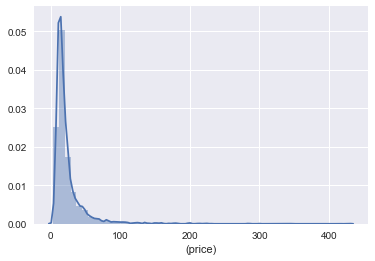

In [172]:
%%time
# Lets check the basic price histogram and see if what is the range of prices 
sns.distplot(brand_name['med'],axlabel="(price)")

Wall time: 78.1 ms


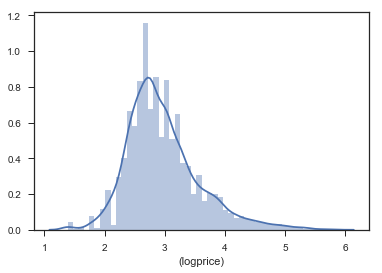

In [188]:
%%time
# Lets check the basic price histogram and see if what is the range of prices 
sns.distplot(brand_name['logmedian'],axlabel="(logprice)")

In [49]:
brand_name['brand_group']=np.where(brand_name['logmedian']>5,5,np.where(brand_name['logmedian']>4,4,np.where(brand_name['logmedian']>3,3,np.where(brand_name['logmedian']>2,2,1))))
brand_name['brand_group']=np.where(brand_name['std']==0,0,brand_name['brand_group'])
brand_name.groupby('brand_group').count()

index  brand   med  logmedian   std  count
brand_group                                            
0             1027   1027  1027       1027  1027   1027
1               27     27    27         27    27     27
2             2126   2126  2126       2126  2126   2126
3             1139   1139  1139       1139  1139   1139
4              183    183   183        183   183    183
5               21     21    21         21    21     21

In [50]:
brand_name.rename(columns={'brand':'brand_name'}, inplace=True)



In [51]:
brand_name.head()
brand_name.to_csv('brand_name.csv', sep=',', encoding='utf-8')

In [32]:
brand_name.head()

index        brand_name    med  logmedian         std  count  brand_group
0   1221           Demdaco  429.0   4.570977  592.555483      2            4
1    346        Auto Meter  344.0   5.843544    0.000000      1            0
2   3463  Proenza Schouler  315.5   5.752658  420.369183      4            5
3   3185              Oris  300.0   5.707110    0.000000      1            0
4    598          Blendtec  250.0   5.525453  107.778477      5            5

In [52]:
data=pd.merge(data,brand_name[['brand_name','brand_group']],left_on=['brand_name'],right_on=['brand_name'],how='left')


In [53]:
# data.drop(columns=['brand_group_x', 'brand_group_y'],inplace=True)
data.head(5)

train_id                                     name  item_condition_id  \
0   1306214       MEN'S hiking Columbia shorts as xl                  3   
1   1348776  Itzy Bitzy Squeaker shoes, toddler sz 6                  3   
2    181975                           VS Yoga shorts                  2   
3    875323          3 receiving blankets and rattle                  1   
4    808377  Spell & gypsy design primrose playdress                  3   

                    category_name         brand_name  price  shipping  \
0     Men/Athletic Apparel/Shorts           Columbia   18.0         0   
1          Kids/Girls 2T-5T/Shoes          unk_brand   10.0         1   
2   Women/Athletic Apparel/Shorts  Victoria's Secret   12.0         1   
3            Kids/Nursery/Bedding          unk_brand   14.0         0   
4  Women/Dresses/Above Knee, Mini        Free People  141.0         0   

                                    item_description  logprice  cat_1  \
0                                 Minor marker specs  2.944439    Men   
1  White Itsy Bitsy Squeaker shoes, toddler sz 6....  2.397895   Kids   
2  Worn maybe twice! Nothing wrong with them. I j...  2.564949  Women   
3  Brand new with tags never opened 3 blankets On...  2.708050   Kids   
4  Mini play dress. Sold out everywhere. Also sol...  4.955827  Women   

      ...                  cat_3 train  cat_1_label  cat_2_label  cat_3_lable  \
0     ...                 Shorts     1            9           37          183   
1     ...                  Shoes     1           10           76          787   
2     ...                 Shorts     1            8           37          183   
3     ...                Bedding     1           10           94          374   
4     ...       Above Knee, Mini     1            8           15          119   

   brand_name_avail  cat_name_avail  brand_label  is_description  brand_group  
0                 0               1            0               1            2  
1                 0               1            1               1            2  
2                 1               1            2               1            2  
3                 0               1            1               1            2  
4                 1               1            3               1            3  

[5 rows x 21 columns]

In [54]:
import  re
import string
from sklearn.feature_extraction import stop_words
def wordCount(text):
    # convert to lower case and strip regex
    try:
         # convert to lower case and strip regex
        text = text.lower()
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        txt = regex.sub(" ", text)
        # tokenize
        # words = nltk.word_tokenize(clean_txt)
        # remove words in stop words
        words = [w for w in txt.split(" ") \
                 if not w in stop_words.ENGLISH_STOP_WORDS and len(w)>3]
        return len(words)
    except: 
        return 0

In [55]:
# add a column of word counts to both the training and test set
data['desc_len'] = data['item_description'].apply(lambda x: wordCount(x))
data['logprice']=np.log(data['price']+1)

In [38]:
df = data[data['train']==1].groupby('desc_len')['logprice'].mean().reset_index()

In [40]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# multiple line plot
plt.plot( 'desc_len', 'logprice', data=df, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=4)
plt.legend()


Index(['Unnamed: 0', 'train_id', 'name', 'item_condition_id', 'category_name',
       'brand_name', 'price', 'shipping', 'item_description', 'logprice',
       ...
       'svd_name_33', 'svd_name_34', 'svd_name_35', 'svd_name_36',
       'svd_name_37', 'svd_name_38', 'svd_name_39', 'max_logprice',
       'min_logprice', 'med_logprice'],
      dtype='object', length=106)

In [41]:
len(data.category_name
    .unique())


1288

In [1]:
data.head()

NameError: name 'data' is not defined

SVD on tf-idf

In [16]:
%%time
# description related tf-idf features 
# I guess "No dscription present won't affact these features ... So, I am not removing them.

tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

full_tfidf = tfidf_vec.fit_transform(data['item_description'].values.tolist() )

train_tfidf = tfidf_vec.transform(data['item_description'].values.tolist())

from sklearn.externals import joblib
joblib.dump(tfidf_vec, 'tfidf_vec_desc_test.pkl') 

n_comp = 40
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
    
train_svd.columns = ['svd_item_'+str(i) for i in range(n_comp)]
data = pd.concat([data, train_svd], axis=1)


from sklearn.externals import joblib
joblib.dump(svd_obj, 'tfidf_vec_desc_test.pkl') 

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [27]:
#testing

# description related tf-idf features 
# I guess "No dscription present won't affact these features ... So, I am not removing them.

tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

full_tfidf = tfidf_vec.fit_transform(data['item_description_new'].values.tolist() )

train_tfidf = tfidf_vec.transform(data['item_description_new'].values.tolist())

from sklearn.externals import joblib
joblib.dump(tfidf_vec, 'tfidf_vec_desc_test.pkl') 

n_comp = 40
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
    
train_svd.columns = ['svd_item_'+str(i) for i in range(n_comp)]
data = pd.concat([data, train_svd], axis=1)


from sklearn.externals import joblib
joblib.dump(svd_obj, 'svd_obj_desc_test.pkl') 

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [36]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

full_tfidf = tfidf_vec.fit_transform(data['item_description_new'].values.tolist() )

train_tfidf = tfidf_vec.transform(data['item_description_new'].values.tolist())

from sklearn.externals import joblib
joblib.dump(tfidf_vec, 'tfidf_vec_desc_test.pkl') 

n_comp = 40
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))

from sklearn.externals import joblib
joblib.dump(svd_obj, 'svd_obj_desc_test.pkl') 

['svd_obj_desc_test.pkl']

In [39]:
from sklearn.externals import joblib
joblib.dump(tfidf_vec, 'tfidf_vec_desc_test.pkl')
from sklearn.externals import joblib
joblib.dump(svd_obj, 'svd_obj_desc_test.pkl')

['svd_obj_desc_test.pkl']

In [38]:
from sklearn.externals import joblib
tfidf_test = joblib.load('tfidf_vec_desc_test.pkl') 
tfidf_test.

In [61]:
data[['item_description','name']].to_csv('data_desc_name.csv', sep=',')

In [66]:
test=pd.read_csv("data_desc_name.csv", sep=',', encoding='latin-1',header=0)

In [67]:
test.head()

Unnamed: 0                                   item_description  \
0           0                                 Minor marker specs   
1           1  White Itsy Bitsy Squeaker shoes, toddler sz 6....   
2           2  Worn maybe twice! Nothing wrong with them. I j...   
3           3  Brand new with tags never opened 3 blankets On...   
4           4  Mini play dress. Sold out everywhere. Also sol...   

                                      name  
0       MEN'S hiking Columbia shorts as xl  
1  Itzy Bitzy Squeaker shoes, toddler sz 6  
2                           VS Yoga shorts  
3          3 receiving blankets and rattle  
4  Spell & gypsy design primrose playdress

In [58]:
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle

with open('svd_obj_desc.p', 'wb') as fp:
    pickle.dump(svd_obj, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
full_tfidf

<1186025x143889 sparse matrix of type '<class 'numpy.float64'>'
	with 17080397 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.externals import joblib
joblib.dump(svd_obj, 'svd_obj_desc.pkl') 

['svd_obj_desc.pkl']

In [44]:
from sklearn.externals import joblib
joblib.dump(train_tfidf, 'train_tfidf_desc.pkl') 

['train_tfidf_desc.pkl']

In [45]:
print(data.shape[0])
data = data.loc[data.item_description == data.item_description]

data = data.loc[data.name == data.name]

print(data.shape[0])
print("Dropped records where item description was nan")

1481657
1481657
Dropped records where item description was nan


In [42]:
%%time
# product name related features 

tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
full_tfidf = tfidf_vec.fit_transform(data['name'].values.tolist() )
train_tfidf = tfidf_vec.transform(data['name'].values.tolist())


n_comp = 40
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))

    
train_svd.columns = ['svd_name_'+str(i) for i in range(n_comp)]

data = pd.concat([data, train_svd], axis=1)



Wall time: 48.6 s


In [43]:
from sklearn.externals import joblib
joblib.dump(tfidf_vec, 'tfidf_vec_name_test.pkl')
from sklearn.externals import joblib
joblib.dump(svd_obj, 'svd_obj_name_test.pkl')

['svd_obj_name_test.pkl']

In [69]:
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle

with open('svd_obj_name.p', 'wb') as fp:
    pickle.dump(svd_obj, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
from sklearn.externals import joblib
joblib.dump(svd_obj, 'svd_obj_prod.pkl') 

['svd_obj_prod.pkl']

In [49]:
from sklearn.externals import joblib
joblib.dump(train_tfidf, 'train_tfidf_prod.pkl') 

['train_tfidf_prod.pkl']

In [70]:
data.shape


(1185316, 102)

In [110]:
# train, test = train_test_split(train_df, test_size=0.2)
# import os
# os.getcwd()
# data.head()

train_id                                     name  item_condition_id  \
0   1306214       MEN'S hiking Columbia shorts as xl                  3   
1   1348776  Itzy Bitzy Squeaker shoes, toddler sz 6                  3   
2    181975                           VS Yoga shorts                  2   
3    875323          3 receiving blankets and rattle                  1   
4    808377  Spell & gypsy design primrose playdress                  3   

                    category_name         brand_name  price  shipping  \
0     Men/Athletic Apparel/Shorts                  0   18.0         0   
1          Kids/Girls 2T-5T/Shoes                  0   10.0         1   
2   Women/Athletic Apparel/Shorts  Victoria's Secret   12.0         1   
3            Kids/Nursery/Bedding                  0   14.0         0   
4  Women/Dresses/Above Knee, Mini        Free People  141.0         0   

                                    item_description  logprice  cat_1  \
0                                 Minor marker specs  2.944439    Men   
1  White Itsy Bitsy Squeaker shoes, toddler sz 6....  2.397895   Kids   
2  Worn maybe twice! Nothing wrong with them. I j...  2.564949  Women   
3  Brand new with tags never opened 3 blankets On...  2.708050   Kids   
4  Mini play dress. Sold out everywhere. Also sol...  4.955827  Women   

      ...      svd_name_30 svd_name_31  svd_name_32  svd_name_33  svd_name_34  \
0     ...         0.077251    0.008370     0.115433    -0.058767    -0.007221   
1     ...        -0.015907   -0.070248    -0.016924    -0.045550    -0.000658   
2     ...         0.092797   -0.047184    -0.049602    -0.153679     0.010721   
3     ...         0.000044   -0.000667    -0.001466     0.000681     0.000011   
4     ...         0.000392    0.000697    -0.000440    -0.000697     0.000043   

   svd_name_35  svd_name_36  svd_name_37  svd_name_38  svd_name_39  
0    -0.151114    -0.039187     0.119504    -0.030813    -0.072523  
1    -0.051219    -0.049803    -0.085487     0.030485     0.052052  
2     0.066857     0.158307    -0.025265     0.002005     0.012672  
3     0.001729     0.000791     0.001379    -0.000606    -0.001319  
4    -0.000115     0.000348     0.000039     0.000255     0.000029  

[5 rows x 102 columns]

In [5]:
import pandas as pd
# # file_name="Cleaned_data"
# # data.to_csv(file_name, sep='\t')
data=pd.read_csv("Cleaned_data2", sep='\t')

In [72]:

max_logprices=data[data['train']==1].groupby(['cat_1','cat_2','cat_3']).max().logprice.to_frame(name = 'max_logprice').reset_index()
min_logprices=data[data['train']==1].groupby(['cat_1','cat_2','cat_3']).min().logprice.to_frame(name = 'min_logprice').reset_index()
med_logprices=data[data['train']==1].groupby(['cat_1','cat_2','cat_3']).median().logprice.to_frame(name = 'med_logprice').reset_index()


data=pd.merge(data,
                 max_logprices,
                 on=['cat_1','cat_2','cat_3'])
data=pd.merge(data,
                 min_logprices,
                 on=['cat_1','cat_2','cat_3'])
data=pd.merge(data,
                 med_logprices,
                 on=['cat_1','cat_2','cat_3'])

In [73]:
max_min=pd.merge(min_logprices,
                 max_logprices,
                 on=['cat_1','cat_2','cat_3'])
max_min_med=pd.merge(max_min,
                 med_logprices,
                 on=['cat_1','cat_2','cat_3'])

In [75]:
max_min_med.to_csv("max_min_med.csv", sep=',')


In [7]:
data=pd.merge(data,
                 max_logprices,
                 on=['cat_1','cat_2','cat_3'])
data=pd.merge(data,
                 min_logprices,
                 on=['cat_1','cat_2','cat_3'])
data=pd.merge(data,
                 med_logprices,
                 on=['cat_1','cat_2','cat_3'])

(1176791, 105)

In [77]:
# XGboost regressor ...
# replace all nan with -1 
print(data.isnull().sum())
data.fillna(0, inplace=True)
data.fillna(0, inplace=True)
print(data.isnull().sum())

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
logprice             0
cat_1                0
cat_2                0
cat_3                0
train                0
cat_1_label          0
cat_2_label          0
cat_3_lable          0
brand_name_avail     0
cat_name_avail       0
brand_label          0
is_description       0
brand_group          0
desc_len             0
svd_item_0           0
svd_item_1           0
svd_item_2           0
svd_item_3           0
svd_item_4           0
svd_item_5           0
svd_item_6           0
svd_item_7           0
                    ..
svd_name_13          0
svd_name_14          0
svd_name_15          0
svd_name_16          0
svd_name_17          0
svd_name_18          0
svd_name_19          0
svd_name_20          0
svd_name_21          0
svd_name_22          0
svd_name_23          0
svd_name_24          0
svd_name_25

In [78]:
train = data[data['train']==1].copy()
#test = data[data['train']==0].drop(['price','logprice'],axis=1).copy()
#print("Difference of features in train and test are {}".format(np.setdiff1d(train.columns, test.columns)))
#print("")
# do_not_use_for_training = ['Unnamed: 0','train','cat_1','test_id','cat_2','cat_3','train_id','name', 'category_name', 'brand_name', 'price', 'item_description','logprice']
do_not_use_for_training = ['is_description','min_logprice','Unnamed: 0','train','cat_1','test_id','cat_2','cat_3','train_id','name', 'category_name', 'brand_name', 'price', 'item_description','logprice']

feature_names = [f for f in train.columns if f not in do_not_use_for_training]
print("We will be using following features for training {}.".format(feature_names))
print("")
print("Total number of features are {}.".format(len(feature_names)))


We will be using following features for training ['item_condition_id', 'shipping', 'cat_1_label', 'cat_2_label', 'cat_3_lable', 'brand_name_avail', 'cat_name_avail', 'brand_label', 'brand_group', 'desc_len', 'svd_item_0', 'svd_item_1', 'svd_item_2', 'svd_item_3', 'svd_item_4', 'svd_item_5', 'svd_item_6', 'svd_item_7', 'svd_item_8', 'svd_item_9', 'svd_item_10', 'svd_item_11', 'svd_item_12', 'svd_item_13', 'svd_item_14', 'svd_item_15', 'svd_item_16', 'svd_item_17', 'svd_item_18', 'svd_item_19', 'svd_item_20', 'svd_item_21', 'svd_item_22', 'svd_item_23', 'svd_item_24', 'svd_item_25', 'svd_item_26', 'svd_item_27', 'svd_item_28', 'svd_item_29', 'svd_item_30', 'svd_item_31', 'svd_item_32', 'svd_item_33', 'svd_item_34', 'svd_item_35', 'svd_item_36', 'svd_item_37', 'svd_item_38', 'svd_item_39', 'svd_name_0', 'svd_name_1', 'svd_name_2', 'svd_name_3', 'svd_name_4', 'svd_name_5', 'svd_name_6', 'svd_name_7', 'svd_name_8', 'svd_name_9', 'svd_name_10', 'svd_name_11', 'svd_name_12', 'svd_name_13', 's

In [12]:
yact_test=data[data['train']==0]['logprice']

In [79]:
y = np.log(train['price'].values + 1)

In [20]:
test.head()

Unnamed: 0  train_id                                    name  \
1382     1185817   1218959  2 UNDER ARMOUR 9" BOXERJOCK 1 XL 1 2XL   
1383     1186068   1343493    Georgia Tech Mesh Shorts Men's Small   
1384     1187004   1103474                Mens Nike Dri-Fit Shorts   
1385     1188316   1156040              Lululemon Men's Size Small   
1386     1189046    274278                      Nike shorts medium   

      item_condition_id                category_name        brand_name  \
1382                  1  Men/Athletic Apparel/Shorts      Under Armour   
1383                  3  Men/Athletic Apparel/Shorts  Russell Athletic   
1384                  2  Men/Athletic Apparel/Shorts              Nike   
1385                  3  Men/Athletic Apparel/Shorts         Lululemon   
1386                  3  Men/Athletic Apparel/Shorts              Nike   

      shipping                                   item_description cat_1  \
1382         0  Under Armour Original Series Boxerjock Color B...   Men   
1383         1             Worn a couple times. No signs of wear.   Men   
1384         1  No flaws Drawstring Black with white Small Smo...   Men   
1385         0            Lulu men's lined shorts. Good condition   Men   
1386         0  Black with grey size medium from smoke pet fre...   Men   

                 cat_2      ...      svd_name_33  svd_name_34  svd_name_35  \
1382  Athletic Apparel      ...        -0.007810    -0.008021    -0.020789   
1383  Athletic Apparel      ...        -0.048315     0.001413    -0.098941   
1384  Athletic Apparel      ...         0.000414     0.002224     0.046279   
1385  Athletic Apparel      ...         0.029231    -0.003625    -0.256245   
1386  Athletic Apparel      ...        -0.015596    -0.000401     0.049385   

      svd_name_36  svd_name_37  svd_name_38  svd_name_39  max_logprice  \
1382     0.003138     0.021735    -0.012272    -0.019035       5.01728   
1383    -0.005832     0.084192    -0.035953    -0.153410       5.01728   
1384     0.007024    -0.015033     0.005029    -0.039281       5.01728   
1385     0.130692     0.028797     0.001458    -0.110247       5.01728   
1386    -0.002235    -0.007790     0.002389    -0.037005       5.01728   

      min_logprice  med_logprice  
1382      1.386294      2.772589  
1383      1.386294      2.772589  
1384      1.386294      2.772589  
1385      1.386294      2.772589  
1386      1.386294      2.772589  

[5 rows x 104 columns]

In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
X=train[feature_names]
y=train['logprice']

In [16]:

regr = ElasticNet(random_state=0)
regr.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [19]:
y_elastic=regr.predict(test[feature_names])
print("RMSE is {}".format(rmse(y_elastic,data[data['train']==0]['logprice']))) 

RMSE is 0.7416256607169737


Elastic net RMSE is 0.7450274432933585

In [82]:
import time
from sklearn.model_selection import train_test_split
Xtr, Xv, ytr, yv = train_test_split(train[feature_names].values, y, test_size=0.2, random_state=1987)

dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
#dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

start = time.time()
xgb_par = {'min_child_weight': 20, 'eta': 0.05, 'colsample_bytree': 0.5, 'max_depth': 15,
            'subsample': 0.9, 'lambda': 2.0, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

model_1 = xgb.train(xgb_par, dtrain, 800, watchlist, early_stopping_rounds=20, maximize=False, verbose_eval=20)
print('Modeling RMSLE %.5f' % model_1.best_score)
end = time.time()
print("Time taken in training is {}.".format(end - start))
# 


[0]	train-rmse:2.46627	valid-rmse:2.46472
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[20]	train-rmse:1.01957	valid-rmse:1.02779
[40]	train-rmse:0.573402	valid-rmse:0.60884
[60]	train-rmse:0.454363	valid-rmse:0.516454
[80]	train-rmse:0.413893	valid-rmse:0.496194
[100]	train-rmse:0.391113	valid-rmse:0.489454
[120]	train-rmse:0.37514	valid-rmse:0.485659
[140]	train-rmse:0.363072	valid-rmse:0.483634
[160]	train-rmse:0.351948	valid-rmse:0.481999
[180]	train-rmse:0.342559	valid-rmse:0.480844
[200]	train-rmse:0.335267	valid-rmse:0.480006
[220]	train-rmse:0.328785	valid-rmse:0.479164
[240]	train-rmse:0.322969	valid-rmse:0.478478
[260]	train-rmse:0.316945	valid-rmse:0.477955
[280]	train-rmse:0.312347	valid-rmse:0.477473
[300]	train-rmse:0.308461	valid-rmse:0.477129
[320]	train-rmse:0.304913	valid-rmse:0.476842
[340]	train-rmse:0.300848	valid-rmse:0.476581
[360]	train-rmse:0.296661	valid-rmse:0.

In [83]:
from sklearn.externals import joblib
joblib.dump(model_1, 'xgboost_model15min.pkl') 


['xgboost_model15min.pkl']

In [2]:
from sklearn.externals import joblib
model_1 = joblib.load('xgboost_model15min.pkl') 

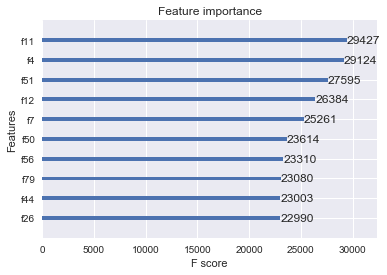

In [195]:
# xgb.plot_importance(model_1)
xgb.plot_importance( model_1,max_num_features=10,title='Feature importance')

In [129]:

feature_dic={}
for index,feature in enumerate(model_1.feature_names):
    feature_dic[feature]=feature_names[index]


In [185]:
# def selectKImportance(model, X, k=5):
#      return X[:,model.feature_importances_.argsort()[::-1][:k]]

John is 23 years old.


In [130]:
score_var=(model_1.get_fscore())

In [131]:
score_var_dataframe=pd.DataFrame.from_dict(score_var,orient = 'index')
score_var_dataframe.reset_index(level=0, inplace=True)
score_var_dataframe.columns=['XG_param','imp']
score_var_dataframe=score_var_dataframe.sort_values(by=['imp'],ascending=False)
score_var_dataframe.reset_index(level=0, inplace=True)
score_var_dataframe['feature']="NA"
for i,value in enumerate(score_var_dataframe['XG_param']):
    score_var_dataframe['feature'][i]=feature_dic[value]


C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [132]:
# score_var_dataframe.drop('index',axis=1,inplace=True)
print(score_var_dataframe['feature'][:5])


0     svd_name_0
1     svd_item_0
2     svd_item_1
3    brand_label
4     svd_item_7
Name: feature, dtype: object


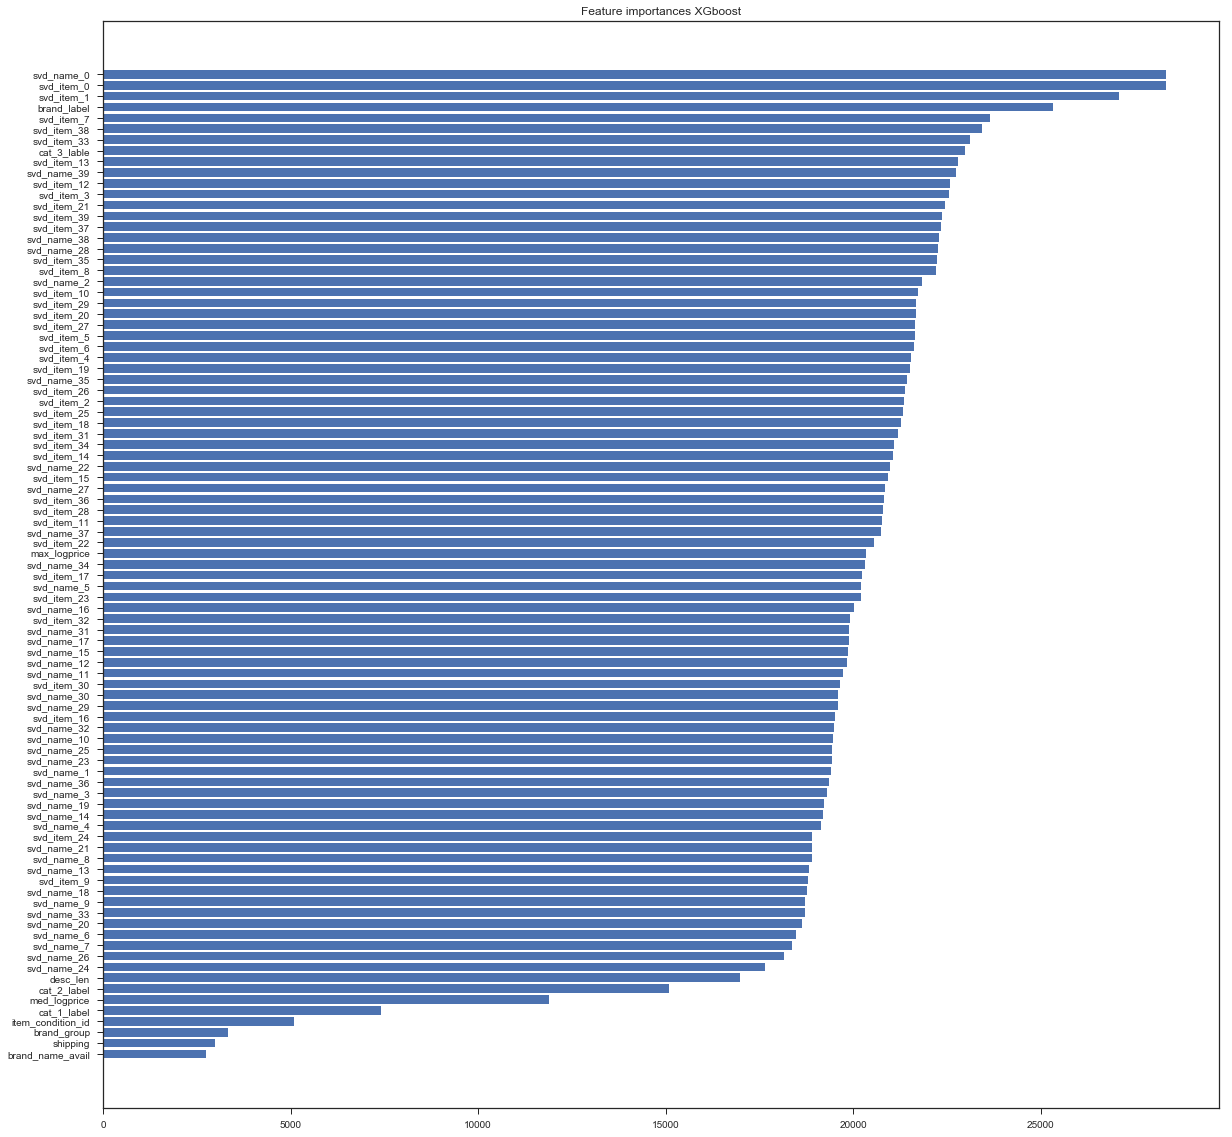

In [133]:
plt.figure()
a4_dims = (20, 20)
fig, ax = pyplot.subplots(figsize=a4_dims)

plt.title("Feature importances XGboost")
y_pos = 90-np.arange(len(score_var_dataframe['feature']))
 
# Create horizontal bars
plt.barh(y_pos, score_var_dataframe['imp'])
 
# Create names on the y-axis
plt.yticks(y_pos, score_var_dataframe['feature'])
 
# Show graphic
plt.show()


In [19]:
start = time.time()
yvalid = model_1.predict(dvalid)
ytest = model_1.predict(dtest)
end = time.time()
print("Time taken in prediction is {}.".format(end - start))

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91']
expected f93, f92 in input data

In [30]:
RMSE=round(((yact_test- ytest) ** 2).mean() ** .5,2)
print("Benchmarking RMSE is {}, we have to make prediction to beat this RMSE".format(RMSE))

Benchmarking RMSE is 0.47, we have to make prediction to beat this RMSE


In [31]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [128]:
rmse(ytest,yact_test) #0.47437048836206963

0.47448370476923246

In [151]:
d1=data[data['train']==0].reset_index()
d2=pd.DataFrame(ytest)
d2.columns=['ytest']


In [190]:
check=pd.concat([d1,d2], axis=1)
check[['ytest','price']].head()

ytest  price
0  3.015244   29.0
1  2.320010   10.0
2  2.536137   10.0
3  3.038082   36.0
4  2.541726   12.0

In [195]:
from math import e
check['pred_price']=pow(e
                        ,check.ytest)

In [196]:
check[['pred_price','price']].head()

pred_price  price
0   20.394054   29.0
1   10.175773   10.0
2   12.630781   10.0
3   20.865181   36.0
4   12.701575   12.0

In [45]:
cat_1list=list(data.cat_1.unique())

In [50]:
test_data=data[data['train']==0 ]
test_data_fea=
cat_rmse_dic={}

In [56]:
testing_data=test_data.loc[test_data['cat_1']=="Men"][feature_names]

In [69]:
for category in cat_1list:
    testing_data=xgb.DMatrix(test_data[test_data['cat_1']==category][feature_names].values)
    ytest_cat = model_1.predict(testing_data)
    yact_cat=  test_data.loc[test_data['cat_1']==category,'logprice']
    rmse_cat=rmse(ytest_cat,yact_cat)
    cat_rmse_dic[category]=rmse_cat
    

In [70]:
cat_rmse_dic

{'Beauty': 0.4717489861540553,
 'Electronics': 0.5354499570202236,
 'Handmade': 0.4903342656554815,
 'Home': 0.4917730667327099,
 'Kids': 0.4812833186180647,
 'Men': 0.45726161410392424,
 'Other': 0.5561379190942342,
 'Sports & Outdoors': 0.5163344098245769,
 'Vintage & Collectibles': 0.6096217471167208,
 'Women': 0.4415616335348653}

In [73]:
cat_rmse_dic_ridge

{'Beauty': 0.5701002456135529,
 'Electronics': 0.6909058426780232,
 'Handmade': 0.5830640929442277,
 'Home': 0.5732120102292799,
 'Kids': 0.554218812258607,
 'Men': 0.5596036605012118,
 'Other': 0.6434710214666446,
 'Sports & Outdoors': 0.6074058696394833,
 'Vintage & Collectibles': 0.7034653779023945,
 'Women': 0.578328447841964}

Imputing the brand names our RMSE reduced from 0.48194961436935735 to 0.4782259105219909

In [36]:
def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [37]:
rmsle(ytest,yact_test) #0.12001479398461284,0.1191792779190569

0.11832187485057007

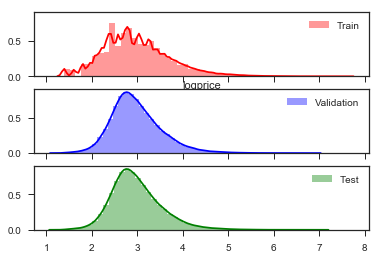

Time taken by above cell is 1.140779972076416.


In [173]:
# Lets check how the distribution of test and vaidation set looks like ...
start = time.time()
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
sns.distplot(y, ax=ax[0], color='red', label='Train')
sns.distplot(yvalid, ax=ax[1], color='blue', label='Validation')
sns.distplot(ytest, ax=ax[2], color='green', label='Test')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
ax[2].legend(loc=0)
plt.show()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

In [39]:
start = time.time()
if test.shape[0] == ytest.shape[0]:
    print('Test shape OK.') 
test['price'] = np.exp(ytest) - 1


Test shape OK.


In [7]:
from sklearn.model_selection import train_test_split
Xtr, Xv, ytr, yv = train_test_split(train[feature_names].values, y, test_size=0.2, random_state=1987)

dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)

In [207]:
from sklearn.externals import joblib
joblib.dump(model_1,'xgboost_model15.pkl')

['xgboost_model15.pkl']

In [209]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV 
from xgboost import XGBRegressor

C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\anukapoor\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [212]:

param_test1 = {
 'max_depth':[10,13],
 'min_child_weight':[15,25]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.05, n_estimators=100, max_depth=13,
 min_child_weight=15, subsample=0.9, colsample_bytree=0.5,objective = 'reg:linear'), 
 param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=4)


In [ ]:
gsearch1.fit(train[feature_names],y)


In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Random Forest

In [ ]:
RXtr, RXv, Rytr, Ryv = train_test_split(train[feature_names], train.logprice, test_size=0.2, random_state=1987)
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators=80,n_jobs=3, verbose=3)
rf.fit(RXtr, Rytr)

In [ ]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(RXtr.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(RXtr.columns[indices[f]])

# Plot the feature importances of the forest
plt.figure()
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

plt.title("Feature importances")
plt.bar(range(RXtr.shape[1]-80), importances[indices][:10],
       color="r", yerr=std[indices][:10], align="center")
plt.xticks(range(RXtr.shape[1]-80), RXtr.columns[indices[:10]])
plt.xlim([-1, RXtr.shape[1]-80])
plt.show()

In [ ]:
col=RXtr.columns[indices]
r2 = r2_score(Ryv , rf.predict(RXv))
mse = np.mean((Ryv - rf.predict(RXv))**2)


pl.scatter(Ryv, rf.predict(RXv))
pl.plot(np.arange(1, 15), np.arange(1, 15), label="r^2=" + str(r2), c="r")
pl.legend(loc="lower right")
pl.title("RandomForest Regression with scikit-learn")
pl.show()


RmSE 0.81

Elastic nets

In [16]:
import numpy as np
import scipy.sparse as sps
from sklearn.preprocessing import StandardScaler
from pyglmnet import GLM

# create an instance of the GLM class
glm = GLM(distr='poisson')



# fit the model on the training data
scaler = StandardScaler().fit(train[feature_names].values)
glm.fit(scaler.transform(train[feature_names].values), y)

# predict using fitted model on the test data
yhat_test = glm.predict(scaler.transform(test[feature_names]))

# score the model
deviance = glm.score(test[feature_names].values,data[data['train']==0]['logprice'].values)

In [94]:
from glmnet import ElasticNet

m = ElasticNet()
m = m.fit(train[feature_names].values, y)

ImportError: No module named 'glmnet'

In [77]:
rmse(yhat_test,data[data['train']==0]['logprice'].values)

0.7179850494610217

In [51]:
test_yact=pd.DataFrame(data[data['train']==0]['logprice'])

check=pd.DataFrame(test_yact,test_yhat)


ValueError: DataFrame constructor not properly called!

In [78]:
yhat_test.shape


(10, 296341)

In [82]:
a=yhat_test

   

In [90]:
b=[]
for i,value in enumerate(a[1]):
    print(a[1][i])
    b.append(value)
    

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.980177195927879
2.98017719

In [95]:

import numpy as np
import scipy.sparse as sps
from sklearn.preprocessing import StandardScaler
from pyglmnet import GLM

# create an instance of the GLM class
glm = GLM(distr='poisson')

n_samples, n_features = 10000, 100

# sample random coefficients
beta0 = np.random.normal(0.0, 1.0, 1)
beta = sps.rand(n_features, 1, 0.1)
beta = np.array(beta.todense())

# simulate training data
X_train = np.random.normal(0.0, 1.0, [n_samples, n_features])
y_train = glm.simulate(beta0, beta, X_train)

# simulate testing data
X_test = np.random.normal(0.0, 1.0, [n_samples, n_features])
y_test = glm.simulate(beta0, beta, X_test)

# fit the model on the training data
scaler = StandardScaler().fit(X_train)
glm.fit(scaler.transform(X_train), y_train)

# predict using fitted model on the test data
yhat_test = glm.predict(scaler.transform(X_test))

# score the model
deviance = glm.score(X_test, y_test)

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge(solver='auto', fit_intercept=True, alpha=0.4, max_iter=200, normalize=False, tol=0.01)
ridge.fit(X, y)





Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=200,
   normalize=False, random_state=None, solver='auto', tol=0.01)

In [41]:
y_ridge=ridge.predict(test[feature_names])
print("RMSE is {}".format(rmse(y_ridge,data[data['train']==0]['logprice']))) 
#RMSE is 0.6387414579496773

RMSE is 0.5901037937427305


In [71]:
cat_rmse_dic_ridge={}
for category in cat_1list:
    testing_data=test_data[test_data['cat_1']==category][feature_names]
    ytest_cat = ridge.predict(testing_data)
    yact_cat=  test_data.loc[test_data['cat_1']==category,'logprice']
    rmse_cat=rmse(ytest_cat,yact_cat)
    cat_rmse_dic_ridge[category]=rmse_cat
    

In [72]:
cat_rmse_dic_ridge

{'Beauty': 0.5701002456135529,
 'Electronics': 0.6909058426780232,
 'Handmade': 0.5830640929442277,
 'Home': 0.5732120102292799,
 'Kids': 0.554218812258607,
 'Men': 0.5596036605012118,
 'Other': 0.6434710214666446,
 'Sports & Outdoors': 0.6074058696394833,
 'Vintage & Collectibles': 0.7034653779023945,
 'Women': 0.578328447841964}